In [1]:
#conda install -c conda-forge statsmodels matplotlib
#pip install statsmodels matplotlib

In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv("../data/ice_cream_sales.csv")

In [4]:
data.head()

,temp,weekday,cost,price,sales
0,17.3,6,1.5,5.6,173
1,25.4,3,0.3,4.9,196
2,23.3,5,1.5,7.6,207
3,26.9,1,0.3,5.3,241
4,20.2,1,1.0,7.2,227


In [5]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   temp     10000 non-null  float64
 1   weekday  10000 non-null  int64  
 2   cost     10000 non-null  float64
 3   price    10000 non-null  float64
 4   sales    10000 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [6]:
data.describe()

,temp,weekday,cost,price,sales
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.014230,3.982400,0.818600,6.129420,200.503300
std,3.972403,2.017696,0.461384,1.193519,19.422964
min,10.100000,1.000000,0.300000,1.900000,140.000000
25%,21.300000,2.000000,0.500000,5.300000,187.000000
50%,24.000000,4.000000,0.500000,6.100000,197.000000
75%,26.700000,6.000000,1.000000,6.900000,213.000000
max,37.400000,7.000000,1.500000,10.600000,258.000000


In [23]:
m0 = smf.ols('sales ~ temp', data=data).fit()

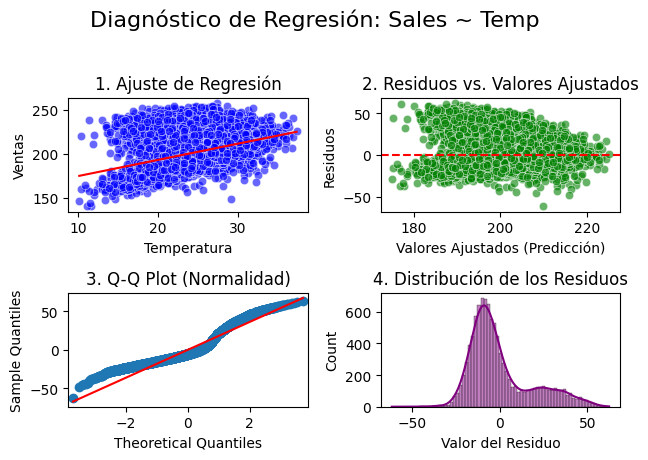

In [29]:
# 3. Gráficos de Diagnóstico
fig, axs = plt.subplots(2, 2)
fig.suptitle('Diagnóstico de Regresión: Sales ~ Temp', fontsize=16)

# --- A. Gráfico de Regresión (Datos + Línea de Ajuste) ---
sns.scatterplot(x=data['temp'], y=data['sales'], ax=axs[0, 0], color='blue', alpha=0.6)
sns.lineplot(x=data['temp'], y=m0.fittedvalues, ax=axs[0, 0], color='red')
axs[0, 0].set_title('1. Ajuste de Regresión')
axs[0, 0].set_xlabel('Temperatura')
axs[0, 0].set_ylabel('Ventas')

# --- B. Residuos vs. Valores Ajustados (Homocedasticidad) ---
residuals = m0.resid
fitted_vals = m0.fittedvalues
sns.scatterplot(x=fitted_vals, y=residuals, ax=axs[0, 1], color='green', alpha=0.6)
axs[0, 1].axhline(0, color='red', linestyle='--')
axs[0, 1].set_title('2. Residuos vs. Valores Ajustados')
axs[0, 1].set_xlabel('Valores Ajustados (Predicción)')
axs[0, 1].set_ylabel('Residuos')

# --- C. Q-Q Plot (Normalidad de los residuos) ---
qqplot(residuals, line='s', ax=axs[1, 0])
axs[1, 0].set_title('3. Q-Q Plot (Normalidad)')

# --- D. Histograma de Residuos (Distribución de errores) ---
sns.histplot(residuals, kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title('4. Distribución de los Residuos')
axs[1, 1].set_xlabel('Valor del Residuo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajuste para el título principal
plt.show()

<Axes: ylabel='Count'>

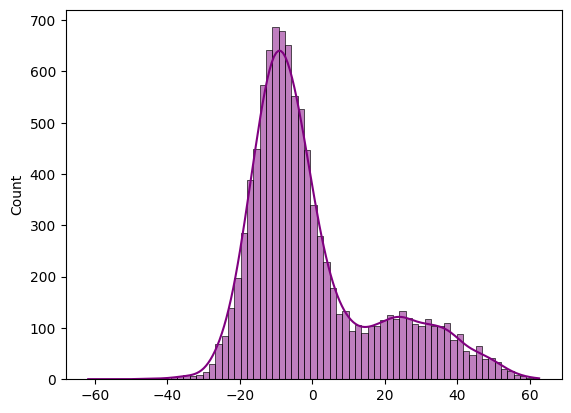

In [ ]:
sns.histplot(
    residuals,
    kde=True,
    color='purple'
)

In [7]:
m1 = smf.ols(
    'sales ~ temp + weekday + cost + price',
    data=data
    ).fit()

In [8]:
m1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,147.8534,1.479,99.968,0.000,144.954,150.753
temp,1.8404,0.045,40.812,0.000,1.752,1.929
weekday,0.1374,0.089,1.548,0.122,-0.037,0.311
cost,-2.2669,0.422,-5.375,0.000,-3.094,-1.440
price,1.5928,0.163,9.770,0.000,1.273,1.912


In [9]:
m1.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.150
Model:,OLS,Adj. R-squared:,0.150
Method:,Least Squares,F-statistic:,440.6
Date:,"Thu, 22 Jan 2026",Prob (F-statistic):,0.00
Time:,19:23:47,Log-Likelihood:,-43041.
No. Observations:,10000,AIC:,8.609e+04
Df Residuals:,9995,BIC:,8.613e+04
Df Model:,4,,
Covariance Type:,nonrobust,,


In [10]:
m2 = smf.ols(
    'sales ~ temp + weekday + cost',
    data=data
    ).fit()

In [11]:
m2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,156.3377,1.203,129.969,0.000,153.980,158.696
temp,1.8386,0.045,40.583,0.000,1.750,1.927
weekday,0.1383,0.089,1.551,0.121,-0.037,0.313
cost,-0.6582,0.390,-1.687,0.092,-1.423,0.106


In [12]:
m2.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.142
Model:,OLS,Adj. R-squared:,0.142
Method:,Least Squares,F-statistic:,550.5
Date:,"Thu, 22 Jan 2026",Prob (F-statistic):,0.00
Time:,19:23:47,Log-Likelihood:,-43089.
No. Observations:,10000,AIC:,8.619e+04
Df Residuals:,9996,BIC:,8.621e+04
Df Model:,3,,
Covariance Type:,nonrobust,,


In [13]:
m2.summary().tables[2]

Omnibus:,1368.949,Durbin-Watson:,1.934
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1994.242
Skew:,1.070,Prob(JB):,0.00
Kurtosis:,3.456,Cond. No.,166.


In [14]:
m3 = smf.ols("sales ~ price + temp+C(weekday)+cost", data=data).fit()
m3.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,201.9694,1.004,201.146,0.000,200.001,203.938
C(weekday)[T.2],-33.8632,0.421,-80.432,0.000,-34.688,-33.038
C(weekday)[T.3],-33.5465,0.429,-78.287,0.000,-34.386,-32.707
C(weekday)[T.4],-33.5294,0.427,-78.441,0.000,-34.367,-32.692
C(weekday)[T.5],-33.4590,0.424,-78.856,0.000,-34.291,-32.627
C(weekday)[T.6],-33.4199,0.430,-77.660,0.000,-34.263,-32.576
C(weekday)[T.7],0.3086,0.408,0.757,0.449,-0.491,1.108
price,-4.0004,0.110,-36.413,0.000,-4.216,-3.785
temp,1.8331,0.028,65.779,0.000,1.778,1.888
cost,3.2659,0.264,12.366,0.000,2.748,3.784


In [15]:
m3.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.676
Model:,OLS,Adj. R-squared:,0.676
Method:,Least Squares,F-statistic:,2315.
Date:,"Thu, 22 Jan 2026",Prob (F-statistic):,0.00
Time:,19:23:47,Log-Likelihood:,-38220.
No. Observations:,10000,AIC:,7.646e+04
Df Residuals:,9990,BIC:,7.653e+04
Df Model:,9,,
Covariance Type:,nonrobust,,


In [16]:
m4 = smf.ols(
    "sales ~ price*cost + price*C(weekday) + price*temp",
    data=data
).fit()

In [17]:
m4.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.808
Model:,OLS,Adj. R-squared:,0.808
Method:,Least Squares,F-statistic:,2470.
Date:,"Thu, 22 Jan 2026",Prob (F-statistic):,0.00
Time:,19:23:48,Log-Likelihood:,-35604.
No. Observations:,10000,AIC:,7.124e+04
Df Residuals:,9982,BIC:,7.137e+04
Df Model:,17,,
Covariance Type:,nonrobust,,


In [18]:
m4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,200.1113,3.188,62.769,0.000,193.862,206.361
C(weekday)[T.2],-118.5501,1.824,-64.992,0.000,-122.126,-114.975
C(weekday)[T.3],-120.3301,1.873,-64.237,0.000,-124.002,-116.658
C(weekday)[T.4],-118.2078,1.855,-63.713,0.000,-121.845,-114.571
C(weekday)[T.5],-119.6481,1.870,-63.984,0.000,-123.314,-115.983
C(weekday)[T.6],-119.5366,1.855,-64.428,0.000,-123.174,-115.900
C(weekday)[T.7],0.5810,1.959,0.297,0.767,-3.259,4.421
price,-2.6762,0.505,-5.297,0.000,-3.667,-1.686
price:C(weekday)[T.2],12.9438,0.283,45.767,0.000,12.389,13.498
price:C(weekday)[T.3],13.2905,0.292,45.583,0.000,12.719,13.862


In [19]:
m4.summary().tables[2]

Omnibus:,166.507,Durbin-Watson:,1.966
Prob(Omnibus):,0.000,Jarque-Bera (JB):,307.968
Skew:,0.095,Prob(JB):,1.34e-67
Kurtosis:,3.839,Cond. No.,7.56e+03


In [20]:
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     2470.
Date:                Thu, 22 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:23:48   Log-Likelihood:                -35604.
No. Observations:               10000   AIC:                         7.124e+04
Df Residuals:                    9982   BIC:                         7.137e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.11